In [2]:
import pandas as pd

In [3]:
train = pd.read_csv('./python_course/train.csv')
print(train.shape)

(42000, 785)


In [4]:
target = train['label']
train = train.drop("label", axis=1)
X= train[:6000].values
Target = target[:6000]
print(X.shape)

(6000, 784)


In [5]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [6]:
X = train.values

In [7]:
X_std = StandardScaler().fit_transform(X)

# Calculating Eigenvectors and eigenvalues of Cov matirx
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the eigenvalue, eigenvector pair from high to low
eig_pairs.sort(key = lambda x: x[0], reverse= True)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

C:\Users\LPX\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [8]:
import matplotlib.pyplot as plt

[Text(0,0.5,'Explained Variance'),
 Text(0.5,0,'Feature columns'),
 Text(0.5,1,'Individual Explained Variance')]

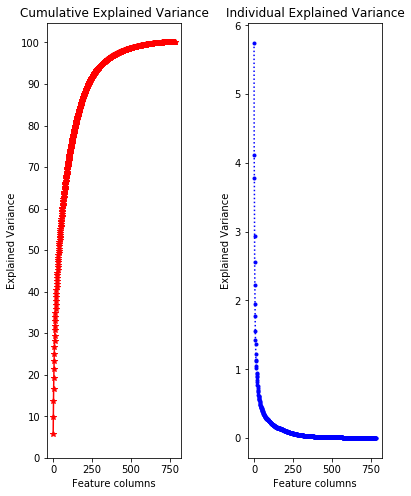

In [9]:
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
plt.subplots_adjust(wspace=0.5, hspace=0)
x = list(range(784))
ax1.plot(x, cum_var_exp, color='r', linestyle='-', marker='*')
ax2.plot(x, var_exp, color='b', linestyle=':', marker='.')
ax1.set_title('Cumulative Explained Variance')
ax1.set_xlabel('Feature columns')
ax1.set_ylabel('Explained Variance')
ax1.set_yticks(list(range(0,101,10)))
props = {
    'title': 'Individual Explained Variance', 
    'xlabel': 'Feature columns',
    'ylabel': 'Explained Variance'
}
ax2.set(**props)

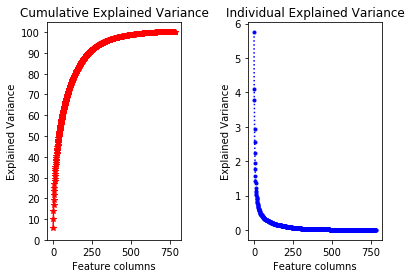

In [88]:
fig = plt.figure()

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
plt.subplots_adjust(wspace=0.5, hspace=0)
x= list(range(784))
ax1.plot(x, cum_var_exp, color='r', linestyle='-', marker='*')
ax1.set_title('Cumulative Explained Variance')
ax1.set_xlabel('Feature columns')
ax1.set_ylabel('Explained Variance')
ax1.set_yticks(list(range(0,101,10)))
ax2.plot(x, var_exp, color='b', linestyle=':', marker='.')
props = {
    'title': 'Individual Explained Variance', 
    'xlabel': 'Feature columns',
    'ylabel': 'Explained Variance'
}
ax2.set(**props)
plt.savefig('variance.png')

In [127]:
# Invoke SKlearn's PCA method
n_components = 30
pca = PCA(n_components=n_components).fit(X)

eigenvectors = pca.components_.reshape(n_components, 28, 28)

# Extracting the PCA components ( eignevalues )
# eigenvalues = pca.components_.reshape(n_components, 28, 28)
eigenvectors = pca.components_

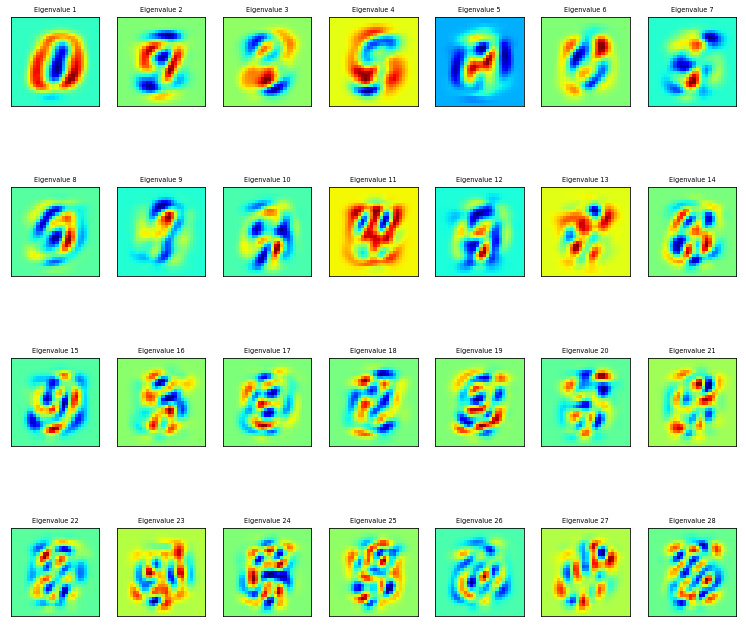

In [128]:
n_row = 4
n_col = 7

# Plot the first 8 eignenvalues
plt.figure(figsize=(13,12))
for i in list(range(n_row * n_col)):
    offset =0
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(eigenvalues[i].reshape(28,28), cmap='jet')
    title_text = 'Eigenvalue ' + str(i + 1)
    plt.title(title_text, size=6.5)
    plt.xticks(())
    plt.yticks(())
plt.show()


In [178]:
pca = PCA(n_components=3)
pca.fit(X_std)
X_2d = pca.transform(X_std)

In [179]:
X_2d[1]

array([19.15454843,  6.34090052,  1.90498773])

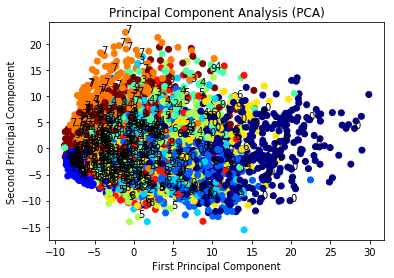

In [180]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
#设置标题
ax1.set_title('Principal Component Analysis (PCA)')
#设置X轴标签
plt.xlabel('First Principal Component')
#设置Y轴标签
plt.ylabel('Second Principal Component')
#画散点图
ax1.scatter(X_2d[:,0],X_2d[:,1],c = Target, cmap='jet', marker = 'o')

for i in range(0,6000,10):
    ax1.annotate(str(Target[i]), (X_2d[i, 0], X_2d[i, 1]))
#设置图标
#显示所画的图
plt.show()

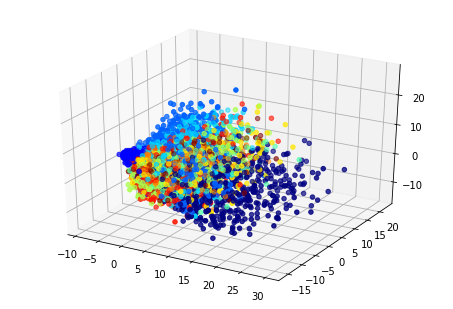

In [187]:
pca = PCA(n_components=3)
pca.fit(X_std)
X_3d = pca.transform(X_std)


from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c=Target,  cmap='jet', marker = 'o')
plt.show()

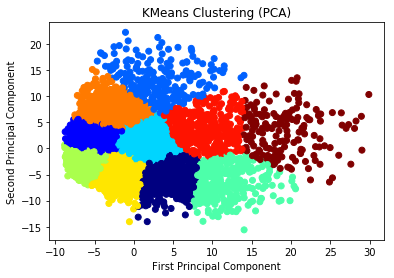

In [137]:
from sklearn.cluster import KMeans # KMeans clustering 

kmeans = KMeans(n_clusters=10)

X_clustered = kmeans.fit_predict(X_2d)

fig = plt.figure()
ax1 = fig.add_subplot(111)
#设置标题
ax1.set_title('KMeans Clustering (PCA)')
#设置X轴标签
plt.xlabel('First Principal Component')
#设置Y轴标签
plt.ylabel('Second Principal Component')
#画散点图
ax1.scatter(X_2d[:,0],X_2d[:,1],c = X_clustered, cmap='jet', marker = 'o')
#显示所画的图
plt.show()


In [140]:
 from sklearn import metrics
    
metrics.adjusted_rand_score(Target, X_clustered)

0.15757606767056795

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


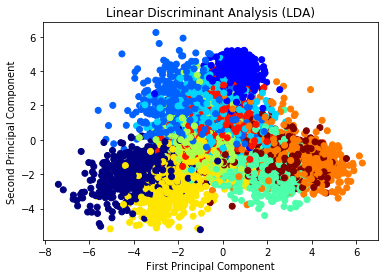

In [144]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
# Taking in as second argument the Target as labels
X_LDA_2D = lda.fit_transform(X_std, Target )

fig = plt.figure()
ax1 = fig.add_subplot(111)
#设置标题
ax1.set_title('Linear Discriminant Analysis (LDA)')
#设置X轴标签
plt.xlabel('First Principal Component')
#设置Y轴标签
plt.ylabel('Second Principal Component')
#画散点图
ax1.scatter(X_LDA_2D[:,0],X_LDA_2D[:,1],c = Target, cmap='jet', marker = 'o')
#设置图标
#显示所画的图
plt.show()

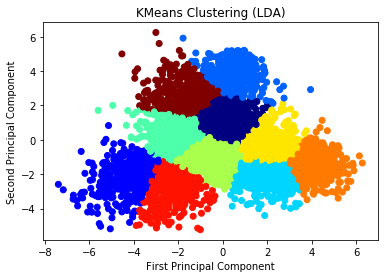

In [146]:
from sklearn.cluster import KMeans # KMeans clustering 

kmeans = KMeans(n_clusters=10)

X_clustered = kmeans.fit_predict(X_LDA_2D)

fig = plt.figure()
ax1 = fig.add_subplot(111)
#设置标题
ax1.set_title('KMeans Clustering (LDA)')
#设置X轴标签
plt.xlabel('First Principal Component')
#设置Y轴标签
plt.ylabel('Second Principal Component')
#画散点图
ax1.scatter(X_LDA_2D[:,0],X_LDA_2D[:,1],c = X_clustered, cmap='jet', marker = 'o')
#显示所画的图
plt.show()


In [147]:
 from sklearn import metrics
    
metrics.adjusted_rand_score(Target, X_clustered)

0.37979942744630774

(<Figure size 576x576 with 1 Axes>,
 [Text(16.0105,-68.3203,'0'),
  Text(5.84199,14.9931,'1'),
  Text(15.7862,-20.6888,'2'),
  Text(-14.7771,-27.7462,'3'),
  Text(5.86136,43.1061,'4'),
  Text(-38.6433,-23.6617,'5'),
  Text(58.6823,-30.1742,'6'),
  Text(-17.4086,67.8322,'7'),
  Text(-36.0259,-6.07846,'8'),
  Text(-3.9899,59.1661,'9')])

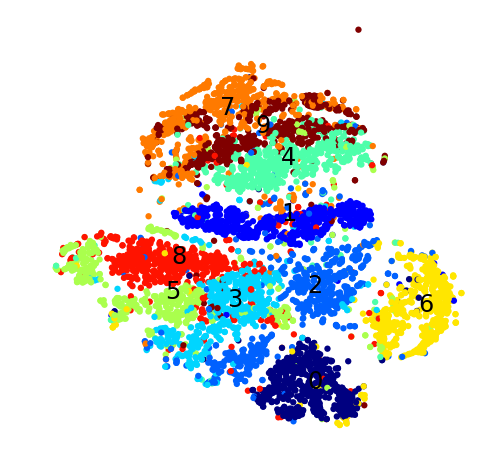

In [155]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(X_std) 

def scatter(x, colors):

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c = Target.values, cmap='jet',)
    plt.xlim(-100, 100)
    plt.ylim(-100, 100)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txts.append(txt)

    return f, ax, sc, txts


scatter(tsne_results, Target.values)

In [153]:
tsne_results

array([[ 13.422335, -24.909222],
       [  8.558427,  72.74628 ],
       [-34.126076,   5.656397],
       ...,
       [-29.201637,  71.58772 ],
       [ 12.156674,  86.964424],
       [ 31.03231 ,  59.9164  ]], dtype=float32)

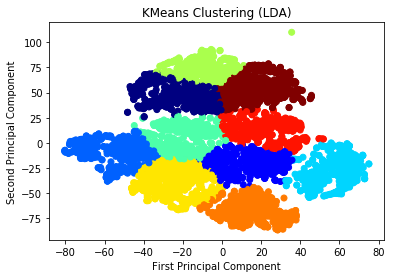

In [156]:
from sklearn.cluster import KMeans # KMeans clustering 

kmeans = KMeans(n_clusters=10)

X_clustered = kmeans.fit_predict(tsne_results)

fig = plt.figure()
ax1 = fig.add_subplot(111)
#设置标题
ax1.set_title('KMeans Clustering (LDA)')
#设置X轴标签
plt.xlabel('First Principal Component')
#设置Y轴标签
plt.ylabel('Second Principal Component')
#画散点图
ax1.scatter(tsne_results[:,0],tsne_results[:,1],c = X_clustered, cmap='jet', marker = 'o')
#显示所画的图
plt.show()

In [157]:
 from sklearn import metrics
    
metrics.adjusted_rand_score(Target, X_clustered)

0.4308698407808709